In [8]:
# 圖片處理resnet 0930_hw3_2

模組

In [9]:
import torch
import torch.nn as nn
from torchvision import models # 處理圖片的 ex.resnet101
from torchvision import transforms # 圖片前處理的
from PIL import Image # 匯入外部圖片
import numpy as np 
import matplotlib.pyplot as plt # 畫圖
from matplotlib import pyplot as plt # 畫圖

In [10]:
resnet = models.resnet101(pretrained=True) # resnet 可以把輸入的圖片找相似 (內建1000個世界上的東西)(是一個有101層的神經網路)
resnet.eval() # 開啟resnet訓練模式(想成初始化)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

圖片前處理

In [11]:
from torchvision import transforms
preprocess = transforms.Compose([ 
    transforms.Resize(256), # 大小變 256 * 256
    transforms.CenterCrop(224), # 剪到 224 * 224
    transforms.ToTensor(), # 照片轉成tensor
    transforms.Normalize( # 用平均值和標準差歸一化張量影象，儲存成電腦看得懂的RGB
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225]
)])

匯入圖片 & 處理訓練

In [12]:
from PIL import Image 
img = Image.open("bobby.jpg") # 匯入名字是bobby.jpg的圖片

img_t = preprocess(img) # 前處理
batch_t = torch.unsqueeze(img_t,0) # unsqueeze0增加橫軸 轉成torch形式 
# 若希望一次處理多張圖片 inp_batch = torch.stack([img1, img2, img3])

out = resnet(batch_t) # 開始用torch訓練
# print(out) # 顯示圖片比較像1000東西裡的哪一個
out.shape # 分成([1, 1000])

# unsqueeze0 為將tensor([1., 2., 3., 4.])為torch.Size([4]) 變成 tensor([[1., 2., 3., 4.]])為torch.Size([1][4])

torch.Size([1, 1000])

標名 & 比例

In [13]:
with open('imagenet_classes.txt') as f: # 有那1000東西名字的素材庫=f
  labels = [line.strip() for line in f.readlines()] # 讀f中每一行 去除掉空格 給成labels

_, index = torch.max(out,1) # dim=1為找行 out(已經被分類好的圖片)中最大的數值的 會輸出(value,index) 只需要index
# dim = 1 表示行，若改寫成 dim = 0 則為列

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 # 把out每一行中縮小成0-1 取最大[0][0] 取出真實的數字
# out為為tensor[1][1000]
# torch.nn.functional.softmax 將每個元素縮放到（0,1）區間且和為1 

index[0] # 為最大值 為最相近的 為tensor所以要取[0]轉成數字

labels[index[0]], percentage[index[0]].item() # 最像的label和比例

('golden retriever', 96.47538757324219)

前五個相似的

In [14]:
_, indices = torch.sort(out, descending=True) # 由大到小排列 取index(indices) indeices為[1][1000]

[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] # 取前五個 找label和比例

[('golden retriever', 96.47538757324219),
 ('Labrador retriever', 2.7022273540496826),
 ('cocker spaniel, English cocker spaniel, cocker', 0.22942133247852325),
 ('redbone', 0.19914288818836212),
 ('tennis ball', 0.12322695553302765)]

畫圖

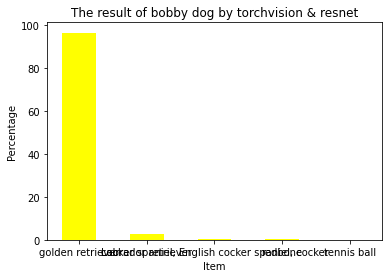

In [15]:
import numpy as np
import matplotlib.pyplot as plt

data = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]] # 指派給data

x = [ data[0][0],data[1][0],data[2][0],data[3][0],data[4][0] ] # 名字
y = [ data[0][1],data[1][1],data[2][1],data[3][1],data[4][1] ] # 比例

plt.bar(x,y,color='yellow',width=0.5)
plt.xlabel("Item")
plt.ylabel("Percentage")
plt.title("The result of bobby dog by torchvision & resnet")
plt.show()

網路上三張圖片的https://datasciocean.tech/pytorch-%E6%95%99%E5%AD%B8/pytorch-resnet-image-classifier/